# WeightWatcher ResNet-1K

For Nature paper: uses weightwatcher 0.4 , but with ww2x=True for back compatability

## Calculations of Results

In [1]:
REPEAT = False # set true to rerun weightwatcher calculations from scratch
SAVE_DATA = False # DO NOT set True unless you want to replace all files in ./data

In [2]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [18]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.INFO)

### Import WeightWatcher

set custom Logging at WARN Level

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARN)

import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model
import torch

import weightwatcher as ww
ww.__version__


Using TensorFlow backend.


'0.2.7'

###  Helper Notebook to make Plots


In [5]:
import import_ipynb
import ModelPlots as MP

importing Jupyter notebook from ModelPlots.ipynb


### ImageNet 1K Data

In [6]:
len(pytorchcv.model_provider._models.keys())

707

In [7]:
series_name = 'ResNet-1K'


all_names = []
all_models = []

for modelname in pytorchcv.model_provider._models.keys():
    if  modelname.startswith('resnet'):
        if 'cifar' not in modelname :
            if 'svhn' not in modelname :
                if 'cub' not in modelname :
                    
                    print(modelname)
                    try:
                        model = ptcv_get_model(modelname, pretrained=True)
                        all_models.append(model)
                        all_names.append(modelname)

                    except Exception as err:
                        print(err)
                        print("{} not found".format(modelname))


resnet10
resnet12
resnet14
resnetbc14b
resnet16
resnet18_wd4
resnet18_wd2
resnet18_w3d4
resnet18
resnet26
resnetbc26b
resnet34
resnetbc38b
resnet50
resnet50b
resnet101
resnet101b
resnet152
resnet152b
resnet200
Pretrained model for resnet200 is not available.
resnet200 not found
resnet200b
Pretrained model for resnet200b is not available.
resnet200b not found
resnetd50b
resnetd101b
resnetd152b


### Only using the first 19 ResNets

In [8]:
all_names, len(all_names)

(['resnet10',
  'resnet12',
  'resnet14',
  'resnetbc14b',
  'resnet16',
  'resnet18_wd4',
  'resnet18_wd2',
  'resnet18_w3d4',
  'resnet18',
  'resnet26',
  'resnetbc26b',
  'resnet34',
  'resnetbc38b',
  'resnet50',
  'resnet50b',
  'resnet101',
  'resnet101b',
  'resnet152',
  'resnet152b',
  'resnetd50b',
  'resnetd101b',
  'resnetd152b'],
 22)

In [9]:
all_names = all_names[0:19]
all_names

['resnet10',
 'resnet12',
 'resnet14',
 'resnetbc14b',
 'resnet16',
 'resnet18_wd4',
 'resnet18_wd2',
 'resnet18_w3d4',
 'resnet18',
 'resnet26',
 'resnetbc26b',
 'resnet34',
 'resnetbc38b',
 'resnet50',
 'resnet50b',
 'resnet101',
 'resnet101b',
 'resnet152',
 'resnet152b']

### Get reported accuracies from OSMR website

https://github.com/osmr/imgclsmob

<pre>
<table class="docutils align-default">
<td>ResNet-10</td>
<td align=right>34.69</td>
<td align=right>14.36</td>
<td align=right>5,418,792</td>
<td align=right>894.04M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.248/resnet10-1436-67d9a618.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-12</td>
<td align=right>33.62</td>
<td align=right>13.28</td>
<td align=right>5,492,776</td>
<td align=right>1,126.25M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.253/resnet12-1328-d7d2f4d6.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-14</td>
<td align=right>32.45</td>
<td align=right>12.46</td>
<td align=right>5,788,200</td>
<td align=right>1,357.94M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.256/resnet14-1246-d5b55c11.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-BC-14b</td>
<td align=right>30.66</td>
<td align=right>11.51</td>
<td align=right>10,064,936</td>
<td align=right>1,479.12M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.309/resnetbc14b-1151-ca61209c.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-16</td>
<td align=right>30.49</td>
<td align=right>11.18</td>
<td align=right>6,968,872</td>
<td align=right>1,589.34M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.259/resnet16-1118-d54bc41a.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18 x0.25</td>
<td align=right>39.62</td>
<td align=right>17.85</td>
<td align=right>3,937,400</td>
<td align=right>270.94M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.262/resnet18_wd4-1785-fe79b31f.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18 x0.5</td>
<td align=right>33.80</td>
<td align=right>13.27</td>
<td align=right>5,804,296</td>
<td align=right>608.70M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.263/resnet18_wd2-1327-6654f50a.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18 x0.75</td>
<td align=right>30.40</td>
<td align=right>11.06</td>
<td align=right>8,476,056</td>
<td align=right>1,129.45M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.266/resnet18_w3d4-1106-3636648b.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-18</td>
<td align=right>28.53</td>
<td align=right>9.82</td>
<td align=right>11,689,512</td>
<td align=right>1,820.41M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.153/resnet18-0982-0126861b.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-26</td>
<td align=right>26.30</td>
<td align=right>8.54</td>
<td align=right>17,960,232</td>
<td align=right>2,746.79M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.305/resnet26-0854-25834733.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-BC-26b</td>
<td align=right>25.09</td>
<td align=right>7.97</td>
<td align=right>15,995,176</td>
<td align=right>2,356.67M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.313/resnetbc26b-0797-7af52a73.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-34</td>
<td align=right>24.84</td>
<td align=right>7.80</td>
<td align=right>21,797,672</td>
<td align=right>3,672.68M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.291/resnet34-0780-3f775482.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-BC-38b</td>
<td align=right>23.69</td>
<td align=right>7.00</td>
<td align=right>21,925,416</td>
<td align=right>3,234.21M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.328/resnetbc38b-0700-3fbac61d.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-50</td>
<td align=right>22.28</td>
<td align=right>6.33</td>
<td align=right>25,557,032</td>
<td align=right>3,877.95M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.329/resnet50-0633-b00d1c8e.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-50b</td>
<td align=right>22.39</td>
<td align=right>6.38</td>
<td align=right>25,557,032</td>
<td align=right>4,110.48M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.308/resnet50b-0638-8a5473ef.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-101</td>
<td align=right>21.90</td>
<td align=right>6.22</td>
<td align=right>44,549,160</td>
<td align=right>7,597.95M</td>
<td>From <a href="https://github.com/dmlc/gluon-cv" rel=nofollow>dmlc/gluon-cv</a> (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.1/resnet101-0622-ab0cf005.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-101b</td>
<td align=right>20.59</td>
<td align=right>5.30</td>
<td align=right>44,549,160</td>
<td align=right>7,830.48M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.357/resnet101b-0530-f059ba3c.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-152</td>
<td align=right>21.01</td>
<td align=right>5.50</td>
<td align=right>60,192,808</td>
<td align=right>11,321.85M</td>
<td>From <a href="https://github.com/dmlc/gluon-cv" rel=nofollow>dmlc/gluon-cv</a> (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.144/resnet152-0550-800b2cb1.pth.log" rel=nofollow>log</a>)</td>
</tr>
<tr>
<td>ResNet-152b</td>
<td align=right>19.92</td>
<td align=right>4.99</td>
<td align=right>60,192,808</td>
<td align=right>11,554.38M</td>
<td>Converted from GL model (<a href="https://github.com/osmr/imgclsmob/releases/download/v0.0.378/resnet152b-0499-667ea926.pth.log" rel=nofollow>log</a>)</td>
</tr>

</tbody>
</table>
</pre>

In [10]:
top1_errors= {
  
"resnet10": 34.69,
"resnet12": 33.62,
"resnet14": 32.45,
"resnetbc14b": 30.66,
"resnet16": 30.49,
"resnet18_wd4": 39.62,
"resnet18_wd2": 33.80,
"resnet18_w3d4": 30.40,
"resnet18": 28.53,
"resnet26": 26.30,
"resnetbc26b": 25.09,
"resnet34": 24.84,
"resnetbc38b": 23.69,
"resnet50": 22.28,
"resnet50b": 22.39,
"resnet101": 21.90,
"resnet101b": 20.59,
"resnet152": 21.01,
"resnet152b": 19.92,
    
}

## Run WeightWatcher, collect summary and details (as dataframes) for all models

In [15]:
all_details = []
all_summaries = []
if REPEAT:
    for im, name in enumerate(tqdm(all_names)):
        watcher = ww.WeightWatcher(model=all_models[im], logger=logger)
        results = watcher.analyze(alphas=True, softranks=True, spectralnorms=True, mp_fit=True,
                                 normalize=False, glorot_fix=False)

        summary =  watcher.get_summary()

        details  = watcher.get_details(results=results)
        details.drop(columns=['slice', 'slice_count'], inplace=True)
        details.dropna(inplace=True)
        details['NxM'] = pd.to_numeric(details.N * details.M)

        details.rename(columns=MP.WW4X_COMPAT_COLUMNS, inplace=True)
        all_details.append(details)

        for k,v in MP.WW4X_COMPAT_COLUMNS.items():
            summary[v]=summary[k]
        all_summaries.append(summary)
else:
    all_details, all_summaries = MP.read_ww2x_data(all_names, datadir='data/resnet-1k')
    
if SAVE_DATA:
    MP.save_ww2x_data(all_names,all_details, all_summaries, datadir='data/resnet-1k')

loading details in data/resnet-1k/resnet10.csv
loading details in data/resnet-1k/resnet12.csv
loading details in data/resnet-1k/resnet14.csv
loading details in data/resnet-1k/resnetbc14b.csv
loading details in data/resnet-1k/resnet16.csv
loading details in data/resnet-1k/resnet18_wd4.csv
loading details in data/resnet-1k/resnet18_wd2.csv
loading details in data/resnet-1k/resnet18_w3d4.csv
loading details in data/resnet-1k/resnet18.csv
loading details in data/resnet-1k/resnet26.csv
loading details in data/resnet-1k/resnetbc26b.csv
loading details in data/resnet-1k/resnet34.csv
loading details in data/resnet-1k/resnetbc38b.csv
loading details in data/resnet-1k/resnet50.csv
loading details in data/resnet-1k/resnet50b.csv
loading details in data/resnet-1k/resnet101.csv
loading details in data/resnet-1k/resnet101b.csv
loading details in data/resnet-1k/resnet152.csv
loading details in data/resnet-1k/resnet152b.csv
loading summary in  data/resnet-1k/resnet10.txt
loading summary in  data/resne

In [16]:
plt.rcParams.update({'font.size': 20})
from pylab import rcParams
rcParams['figure.figsize'] = 15,15

In [17]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (15,15),
         'axes.labelsize': 50,
         'axes.titlesize': 50,#'xx-large',
         'xtick.labelsize':50,
         'ytick.labelsize':50}
plt.rcParams.update(params)

In [18]:
colors = list(np.random.choice(range(256), size=len(all_names)))
first_n_last_ids = [0, len(all_details)-1]

saving img/ResNet-1K_log_norm_accs.png


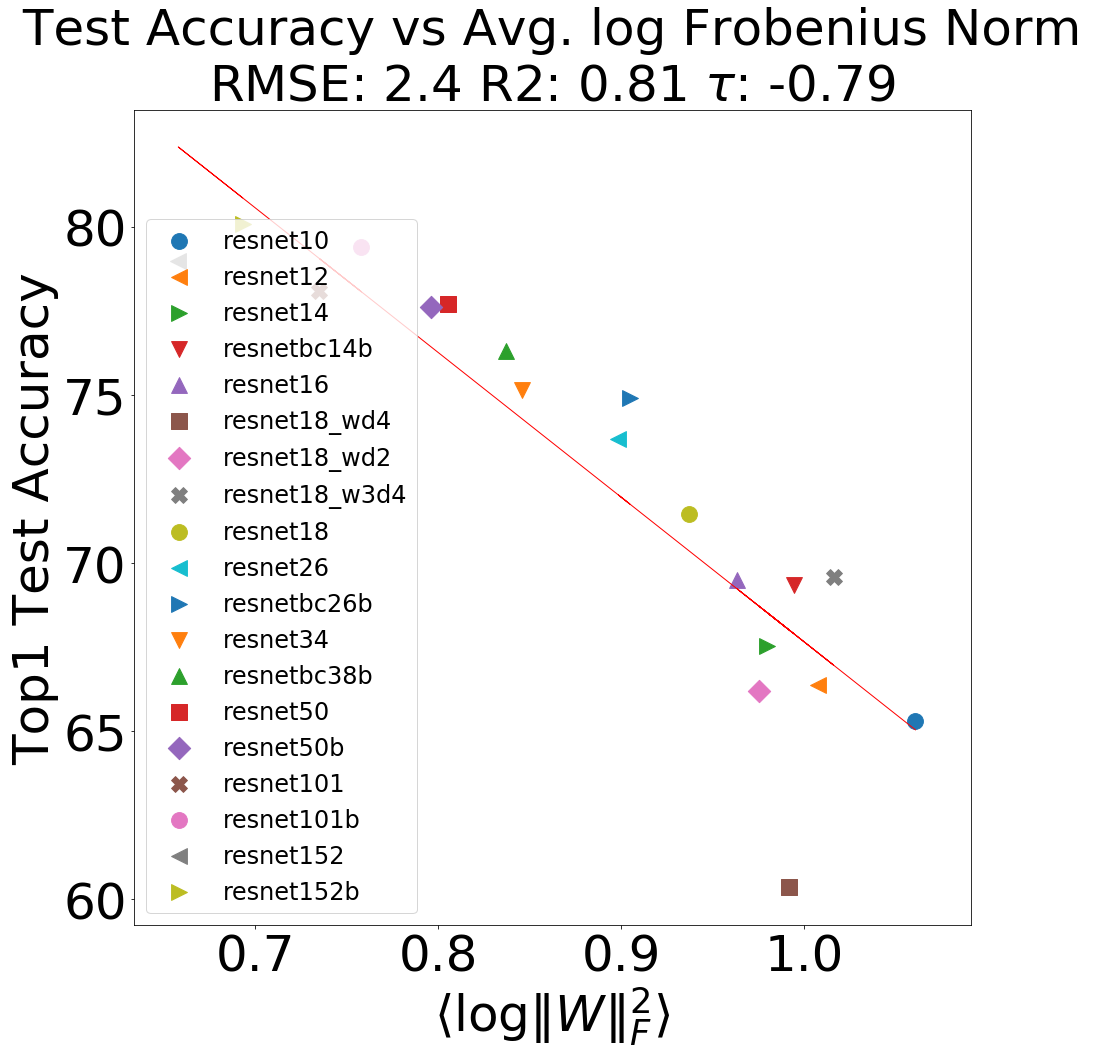

saving img/ResNet-1K_alpha_accs.png


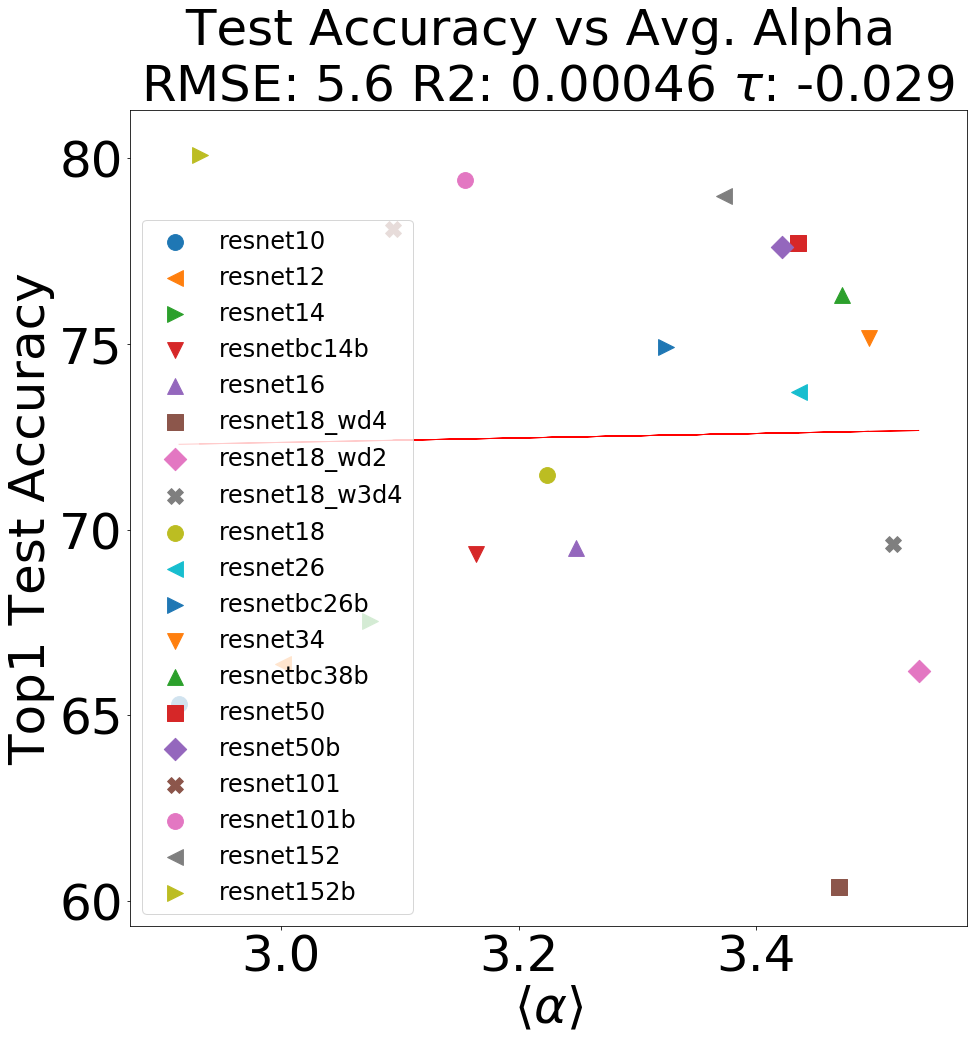

saving img/ResNet-1K_alpha_weighted_accs.png


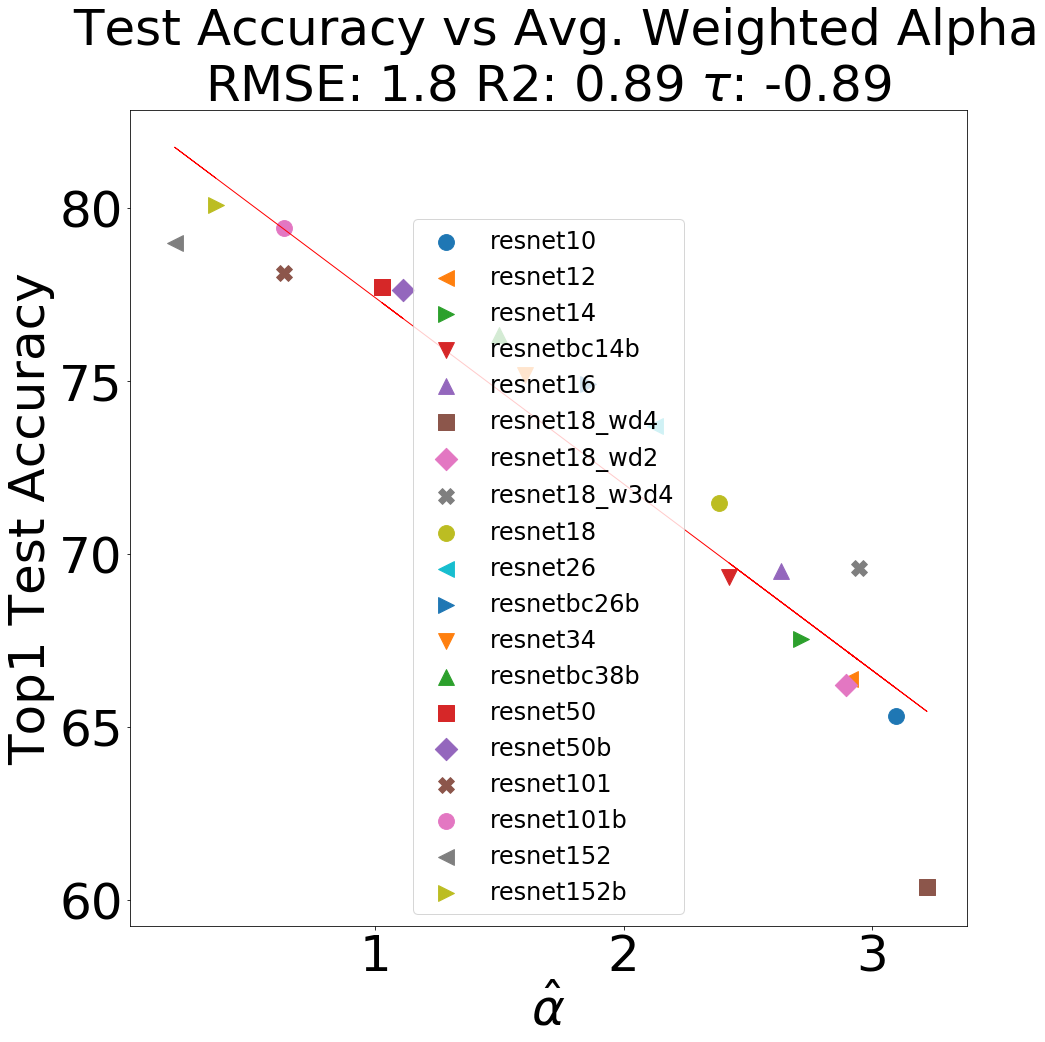

saving img/ResNet-1K_log_spectral_norm_accs.png


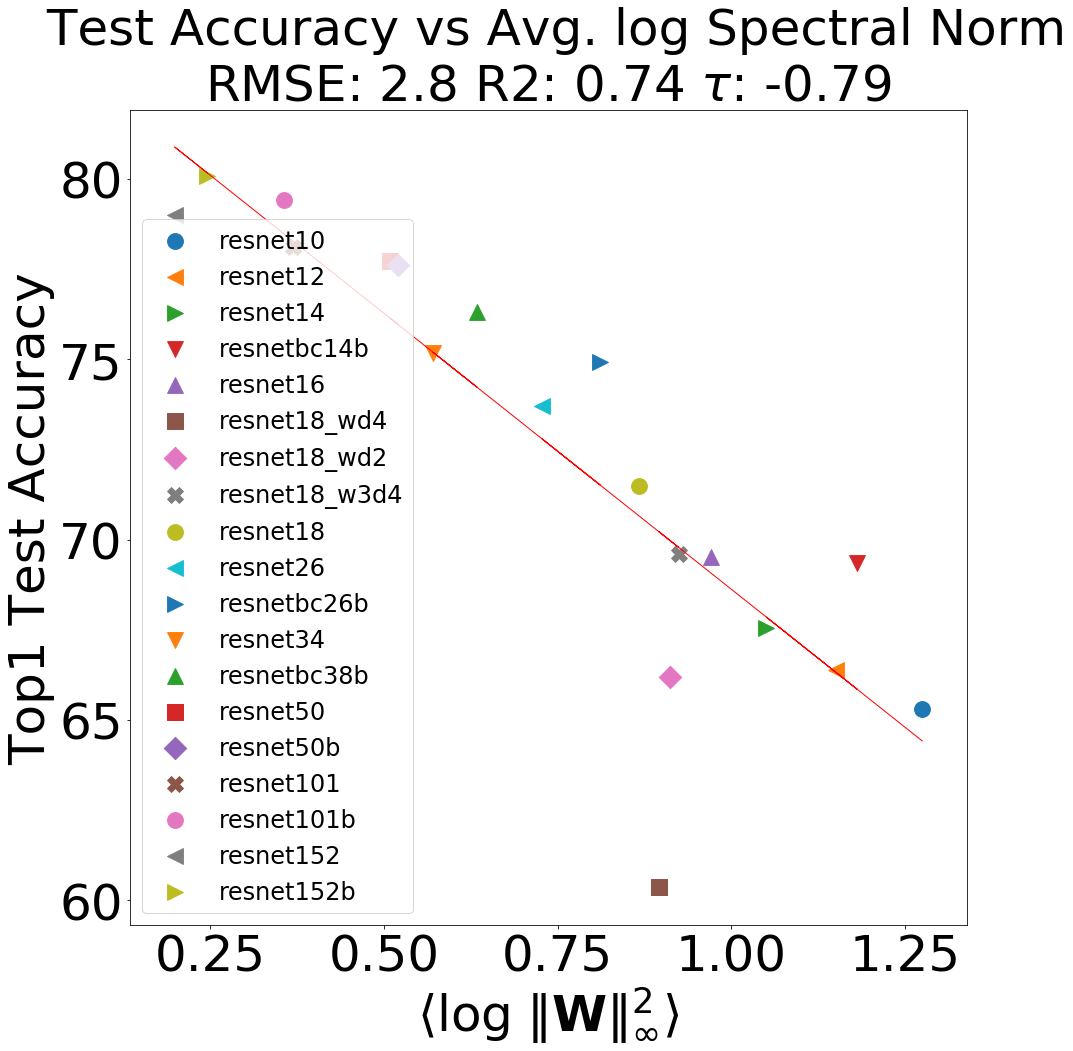

saving img/ResNet-1K_log_stable_rank_accs.png


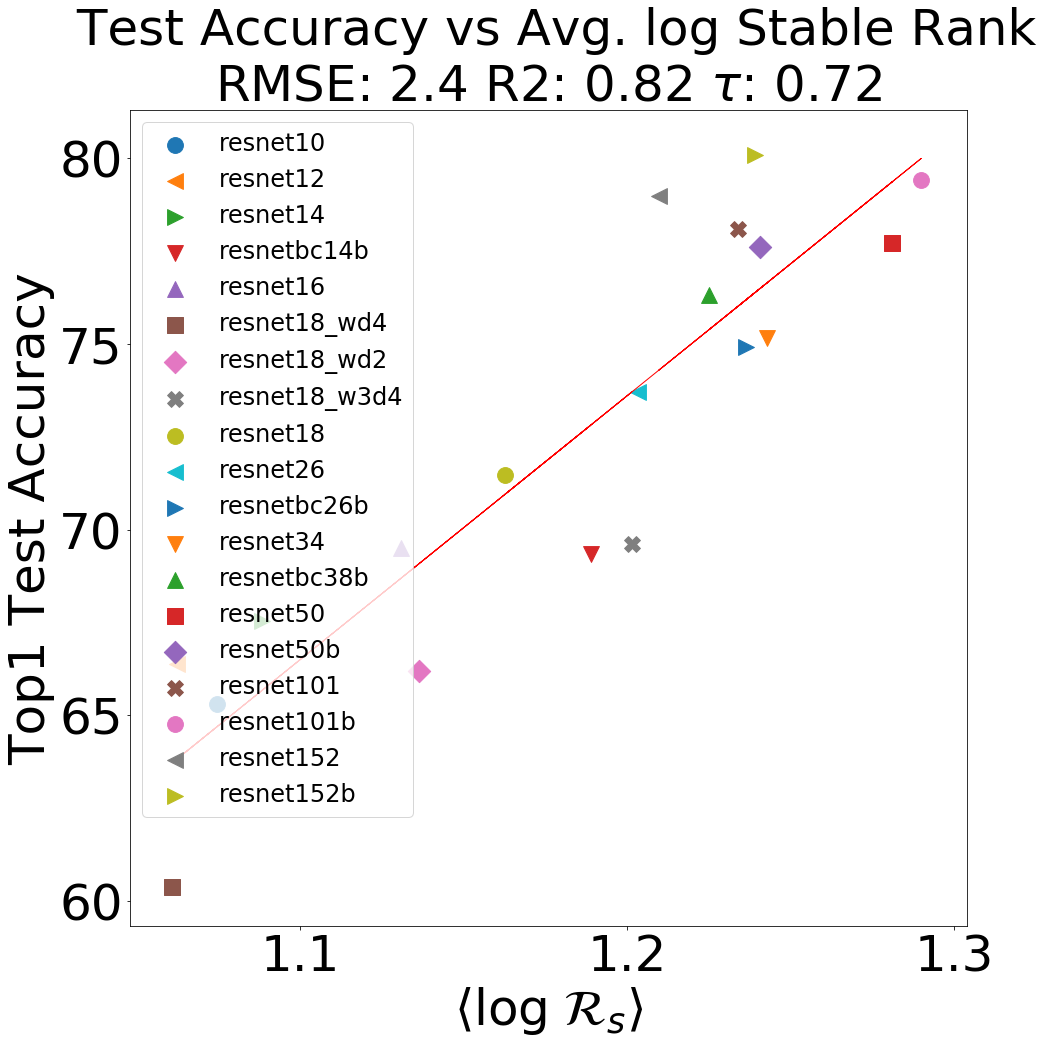

saving img/ResNet-1K_mp_softrank_accs.png


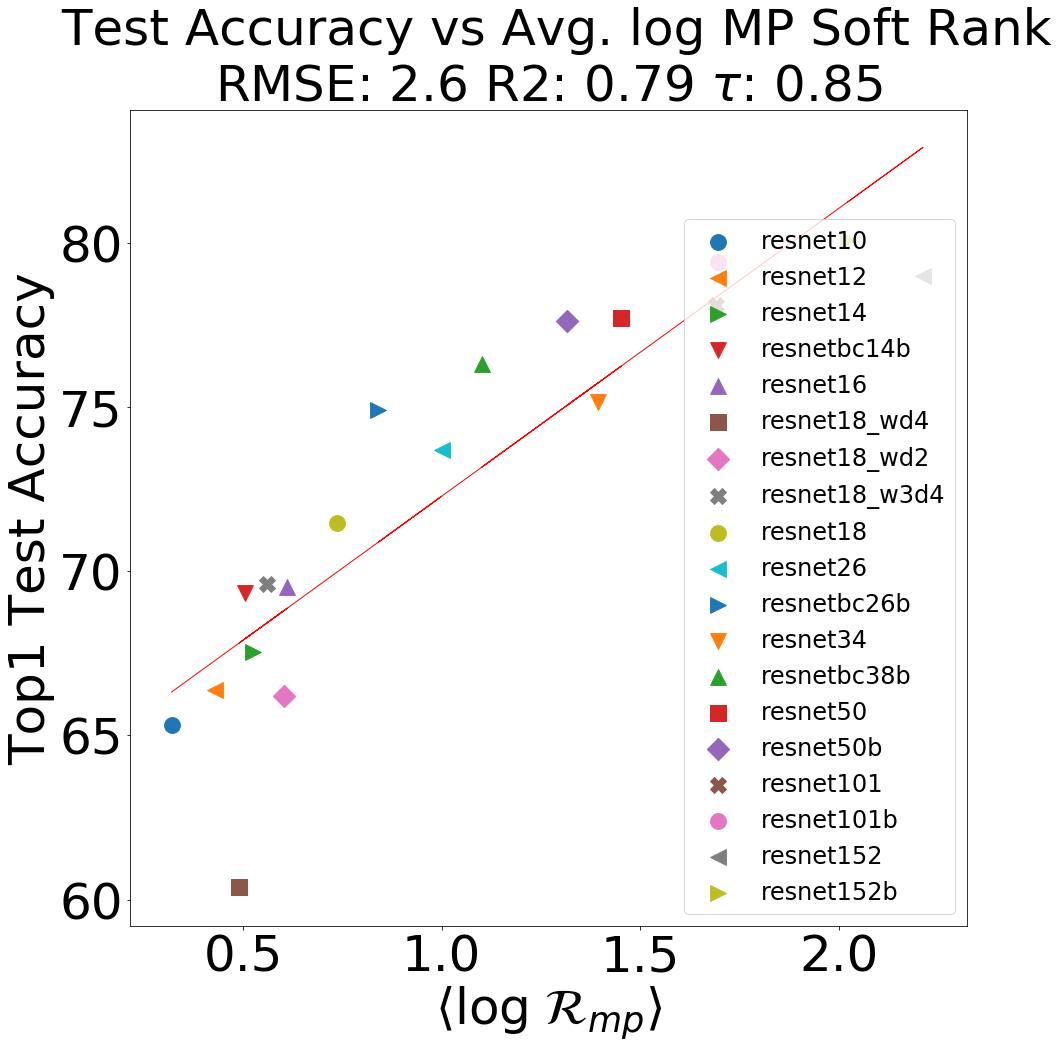

saving img/ResNet-1K_log_alpha_norm_accs.png


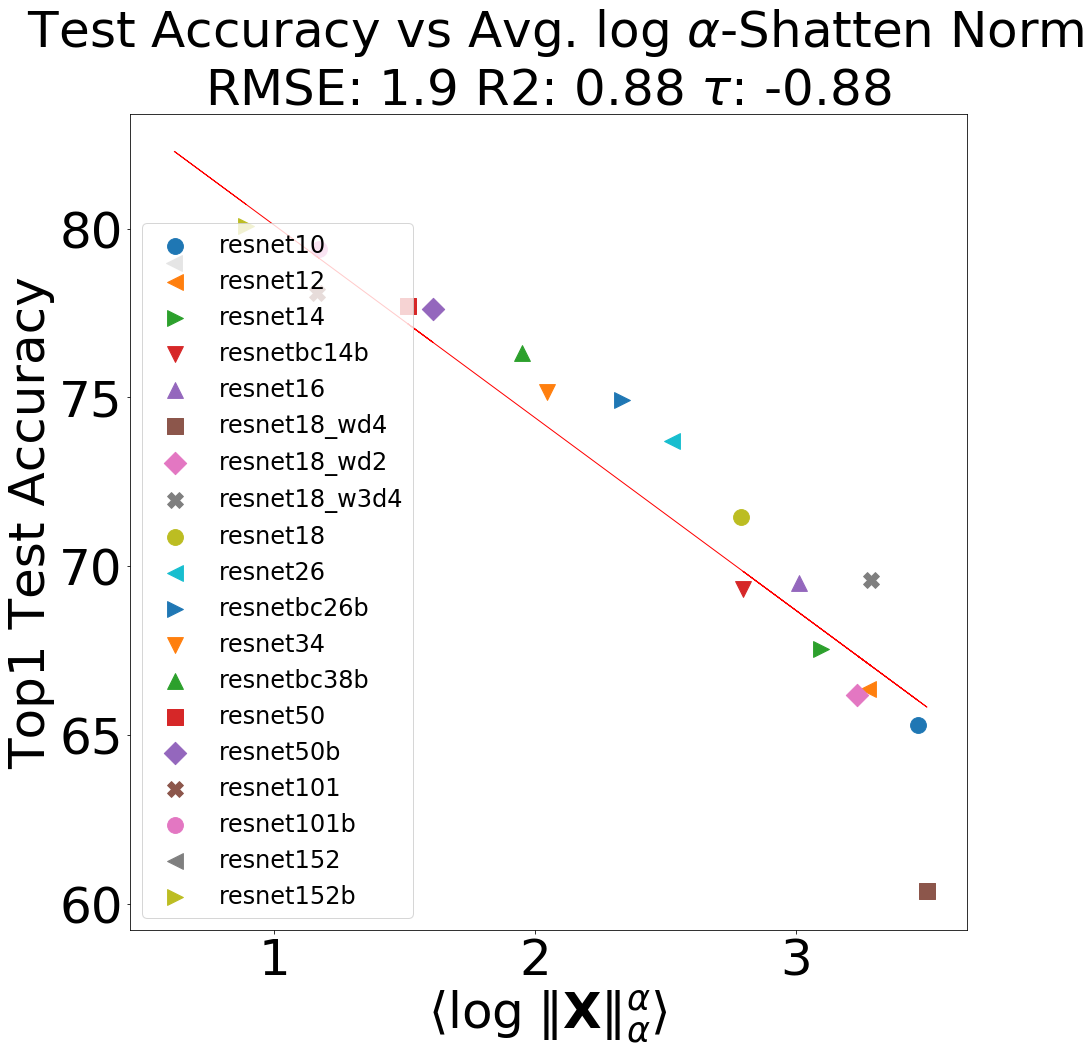

In [19]:
MP.plot_all_metrics_vs_test_accuracies( \
    series_name, all_names, colors, all_summaries, all_details, top1_errors)